In [1]:
!pip install census

In [2]:
!pip install us

In [129]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states
import scipy.stats as st
from scipy.stats import linregress

In [4]:
# Import census API key
from config import api_key
c = Census(api_key, year=2013)

In [82]:
# Request census data
census_county_data = c.acs5.state_county(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E"), Census.ALL, Census.ALL)
census_county_df = pd.DataFrame(census_county_data)
census_county_df.head()

,NAME,B19013_001E,B01003_001E,B01002_001E,B19301_001E,B17001_002E,state,county
0,"Las Marías Municipio, Puerto Rico",15779.0,9699.0,37.3,7000.0,5563.0,72,083
1,"Añasco Municipio, Puerto Rico",16568.0,29086.0,39.4,7892.0,14599.0,72,011
2,"San Sebastián Municipio, Puerto Rico",14463.0,41798.0,39.7,7174.0,22961.0,72,131
3,"Bayamón Municipio, Puerto Rico",24374.0,204725.0,38.6,12648.0,70734.0,72,021
4,"Cataño Municipio, Puerto Rico",18977.0,27669.0,35.6,10567.0,13563.0,72,033


In [83]:
#Clean up the data
census_county_df = census_county_df.drop([ "state","county"],axis=1)
census_county_df.head()

,NAME,B19013_001E,B01003_001E,B01002_001E,B19301_001E,B17001_002E
0,"Las Marías Municipio, Puerto Rico",15779.0,9699.0,37.3,7000.0,5563.0
1,"Añasco Municipio, Puerto Rico",16568.0,29086.0,39.4,7892.0,14599.0
2,"San Sebastián Municipio, Puerto Rico",14463.0,41798.0,39.7,7174.0,22961.0
3,"Bayamón Municipio, Puerto Rico",24374.0,204725.0,38.6,12648.0,70734.0
4,"Cataño Municipio, Puerto Rico",18977.0,27669.0,35.6,10567.0,13563.0


In [84]:
census_county_df[['county','state']] = census_county_df['NAME'].str.split(", ", expand=True)
census_county_df.head()

,NAME,B19013_001E,B01003_001E,B01002_001E,B19301_001E,B17001_002E,county,state
0,"Las Marías Municipio, Puerto Rico",15779.0,9699.0,37.3,7000.0,5563.0,Las Marías Municipio,Puerto Rico
1,"Añasco Municipio, Puerto Rico",16568.0,29086.0,39.4,7892.0,14599.0,Añasco Municipio,Puerto Rico
2,"San Sebastián Municipio, Puerto Rico",14463.0,41798.0,39.7,7174.0,22961.0,San Sebastián Municipio,Puerto Rico
3,"Bayamón Municipio, Puerto Rico",24374.0,204725.0,38.6,12648.0,70734.0,Bayamón Municipio,Puerto Rico
4,"Cataño Municipio, Puerto Rico",18977.0,27669.0,35.6,10567.0,13563.0,Cataño Municipio,Puerto Rico


In [85]:
census_county_df['county'] = census_county_df['county'].str.replace(" County", "")
census_county_df

,NAME,B19013_001E,B01003_001E,B01002_001E,B19301_001E,B17001_002E,county,state
0,"Las Marías Municipio, Puerto Rico",15779.0,9699.0,37.3,7000.0,5563.0,Las Marías Municipio,Puerto Rico
1,"Añasco Municipio, Puerto Rico",16568.0,29086.0,39.4,7892.0,14599.0,Añasco Municipio,Puerto Rico
2,"San Sebastián Municipio, Puerto Rico",14463.0,41798.0,39.7,7174.0,22961.0,San Sebastián Municipio,Puerto Rico
3,"Bayamón Municipio, Puerto Rico",24374.0,204725.0,38.6,12648.0,70734.0,Bayamón Municipio,Puerto Rico
4,"Cataño Municipio, Puerto Rico",18977.0,27669.0,35.6,10567.0,13563.0,Cataño Municipio,Puerto Rico
...,...,...,...,...,...,...,...,...
3216,"Monroe County, West Virginia",41234.0,13512.0,45.8,20294.0,1824.0,Monroe,West Virginia
3217,"Morgan County, West Virginia",36046.0,17502.0,45.5,22312.0,2651.0,Morgan,West Virginia
3218,"Nicholas County, West Virginia",40064.0,26168.0,44.1,23209.0,4957.0,Nicholas,West Virginia
3219,"Ohio County, West Virginia",41025.0,44156.0,43.3,26135.0,6453.0,Ohio,West Virginia


In [86]:
census_county_df = census_county_df.drop(["NAME"],axis=1)
census_county_df.head()

,B19013_001E,B01003_001E,B01002_001E,B19301_001E,B17001_002E,county,state
0,15779.0,9699.0,37.3,7000.0,5563.0,Las Marías Municipio,Puerto Rico
1,16568.0,29086.0,39.4,7892.0,14599.0,Añasco Municipio,Puerto Rico
2,14463.0,41798.0,39.7,7174.0,22961.0,San Sebastián Municipio,Puerto Rico
3,24374.0,204725.0,38.6,12648.0,70734.0,Bayamón Municipio,Puerto Rico
4,18977.0,27669.0,35.6,10567.0,13563.0,Cataño Municipio,Puerto Rico


In [87]:
census_county_df = census_county_df[['state','county','B19013_001E','B01003_001E','B01002_001E','B19301_001E','B17001_002E']]
census_county_df.head()

,state,county,B19013_001E,B01003_001E,B01002_001E,B19301_001E,B17001_002E
0,Puerto Rico,Las Marías Municipio,15779.0,9699.0,37.3,7000.0,5563.0
1,Puerto Rico,Añasco Municipio,16568.0,29086.0,39.4,7892.0,14599.0
2,Puerto Rico,San Sebastián Municipio,14463.0,41798.0,39.7,7174.0,22961.0
3,Puerto Rico,Bayamón Municipio,24374.0,204725.0,38.6,12648.0,70734.0
4,Puerto Rico,Cataño Municipio,18977.0,27669.0,35.6,10567.0,13563.0


In [88]:
census_county_df = census_county_df.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count"})
census_county_df.head()

,state,county,Household Income,Population,Median Age,Per Capita Income,Poverty Count
0,Puerto Rico,Las Marías Municipio,15779.0,9699.0,37.3,7000.0,5563.0
1,Puerto Rico,Añasco Municipio,16568.0,29086.0,39.4,7892.0,14599.0
2,Puerto Rico,San Sebastián Municipio,14463.0,41798.0,39.7,7174.0,22961.0
3,Puerto Rico,Bayamón Municipio,24374.0,204725.0,38.6,12648.0,70734.0
4,Puerto Rico,Cataño Municipio,18977.0,27669.0,35.6,10567.0,13563.0


In [89]:
#Import covid data
covid_county_df = pd.read_csv('us-counties.csv')
covid_county_df.head()

,date,county,state,fips,cases,deaths
0,1/21/20,Snohomish,Washington,53061.0,1,0
1,1/22/20,Snohomish,Washington,53061.0,1,0
2,1/23/20,Snohomish,Washington,53061.0,1,0
3,1/24/20,Cook,Illinois,17031.0,1,0
4,1/24/20,Snohomish,Washington,53061.0,1,0


In [91]:
most_recent_covid_df = covid_county_df.loc[covid_county_pd["date"]=="4/13/20"]
most_recent_covid_df.head()

,date,county,state,fips,cases,deaths
53848,4/13/20,Autauga,Alabama,1001.0,19,1
53849,4/13/20,Baldwin,Alabama,1003.0,78,1
53850,4/13/20,Barbour,Alabama,1005.0,10,0
53851,4/13/20,Bibb,Alabama,1007.0,17,0
53852,4/13/20,Blount,Alabama,1009.0,15,0


In [92]:
most_recent_covid_df = most_recent_covid_df.drop(["date"],axis=1)
most_recent_covid_df.head()

,county,state,fips,cases,deaths
53848,Autauga,Alabama,1001.0,19,1
53849,Baldwin,Alabama,1003.0,78,1
53850,Barbour,Alabama,1005.0,10,0
53851,Bibb,Alabama,1007.0,17,0
53852,Blount,Alabama,1009.0,15,0


In [93]:
#Create a list of the mid west states
mw_state_list = ["Illinois", 'Indiana','Iowa','Kansas','Michigan','Minnesota','Missouri','Nebraska','North Dakota','Ohio','South Dakota','Wisconsin']
mw_state_list

['Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Michigan',
 'Minnesota',
 'Missouri',
 'Nebraska',
 'North Dakota',
 'Ohio',
 'South Dakota',
 'Wisconsin']

In [96]:
# Select midwest states covid data
mw_covid_county_df = most_recent_covid_df[most_recent_covid_df['state'].isin(mw_state_list)]
mw_covid_county_df = mw_covid_county_df[['state','county','fips','cases','deaths']]
mw_covid_county_df.head()

,state,county,fips,cases,deaths
54402,Illinois,Adams,17001.0,26,0
54403,Illinois,Bond,17005.0,4,0
54404,Illinois,Boone,17007.0,13,1
54405,Illinois,Bureau,17011.0,6,0
54406,Illinois,Calhoun,17013.0,1,0


In [95]:
# Select midwest states census data
mw_census_county_df= census_county_df[census_county_df['state'].isin(mw_state_list)]
mw_census_county_df.head()

,state,county,Household Income,Population,Median Age,Per Capita Income,Poverty Count
622,Michigan,Alcona,37189.0,10785.0,55.8,22719.0,1612.0
623,Michigan,Alger,37586.0,9497.0,48.1,19717.0,1257.0
624,Michigan,Allegan,52061.0,111742.0,39.6,24140.0,14933.0
625,Michigan,Alpena,38016.0,29399.0,46.4,21948.0,4999.0
626,Michigan,Antrim,45362.0,23504.0,48.3,24370.0,3570.0


In [97]:
# Check the number of counties in each df
print(len(mw_covid_county_df['county']))
print(len(mw_census_county_df['county']))

831
1055


In [98]:
# Merge covid and census data
mw_census_covid_df = mw_covid_county_df.merge(mw_census_county_df, how='inner', left_on=["state","county"], right_on=["state","county"] )
mw_census_covid_df.head()

,state,county,fips,cases,deaths,Household Income,Population,Median Age,Per Capita Income,Poverty Count
0,Illinois,Adams,17001.0,26,0,45073.0,67152.0,40.6,24217.0,9374.0
1,Illinois,Bond,17005.0,4,0,48163.0,17665.0,40.0,23195.0,2462.0
2,Illinois,Boone,17007.0,13,1,60893.0,54068.0,37.3,25888.0,6055.0
3,Illinois,Bureau,17011.0,6,0,48977.0,34594.0,43.0,26705.0,3955.0
4,Illinois,Calhoun,17013.0,1,0,50436.0,5062.0,45.1,26924.0,593.0


In [99]:
print(len(mw_census_covid_df['county']))

824


In [100]:
# Calculate poverty rate, positive covid rate, mortality rate for each county in midwest. 
mw_census_covid_df["Poverty Rate"] = mw_census_covid_df["Poverty Count"].astype(int)/mw_census_covid_df["Population"].astype(int)
mw_census_covid_df["Positive Rate"] = mw_census_covid_df["cases"].astype(int)/mw_census_covid_df["Population"].astype(int)
mw_census_covid_df["Mortality Rate"] = mw_census_covid_df["deaths"].astype(int)/mw_census_covid_df["cases"].astype(int)

mw_census_covid_df.head()

,state,county,fips,cases,deaths,Household Income,Population,Median Age,Per Capita Income,Poverty Count,Poverty Rate,Positive Rate,Mortality Rate
0,Illinois,Adams,17001.0,26,0,45073.0,67152.0,40.6,24217.0,9374.0,0.139594,0.000387,0.000000
1,Illinois,Bond,17005.0,4,0,48163.0,17665.0,40.0,23195.0,2462.0,0.139372,0.000226,0.000000
2,Illinois,Boone,17007.0,13,1,60893.0,54068.0,37.3,25888.0,6055.0,0.111989,0.000240,0.076923
3,Illinois,Bureau,17011.0,6,0,48977.0,34594.0,43.0,26705.0,3955.0,0.114326,0.000173,0.000000
4,Illinois,Calhoun,17013.0,1,0,50436.0,5062.0,45.1,26924.0,593.0,0.117147,0.000198,0.000000


In [101]:
# Calculate the average poverty rate by state
mw_state_poverty_df = mw_census_covid_df.groupby('state')  
mw_state_poverty_df = pd.DataFrame(mw_state_poverty_df['Poverty Rate'].mean())
mw_state_poverty_df

,Poverty Rate
state,
Illinois,0.129577
Indiana,0.136391
Iowa,0.111926
Kansas,0.132744
Michigan,0.164307
Minnesota,0.113557
Missouri,0.167134
Nebraska,0.111387
North Dakota,0.125061


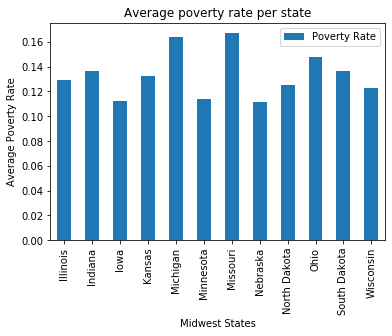

In [107]:
# Bar plot to show average poverty rate per state
state_poverty_bar_chart = mw_state_poverty_df.plot(kind='bar', title="Average poverty rate per state")
state_poverty_bar_chart.set_xlabel("Midwest States")
state_poverty_bar_chart.set_ylabel("Average Poverty Rate")
plt.savefig('Average poverty rate per state in midwest.png')
plt.show()

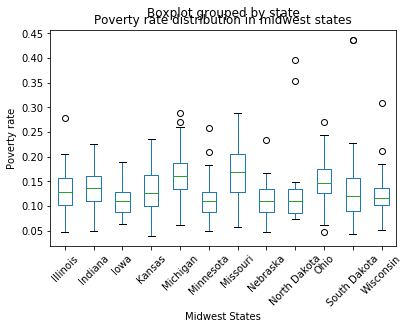

In [112]:
# Box plot to show the distribution of poverty rate in each state
mw_county_poverty_dist = mw_census_covid_df.boxplot(column=['Poverty Rate'], by='state',grid=False, rot=45, fontsize=10)
plt.title("Poverty rate distribution in midwest states")
plt.xlabel("Midwest States")
plt.ylabel("Poverty rate")

plt.savefig('Poverty rate distribution in midwest states.png')
plt.show()

In [113]:
# Calculate the positive covid case by state
mw_state_covid_df = mw_census_covid_df.groupby('state')  
mw_state_positive_df = pd.DataFrame(mw_state_covid_df['cases'].sum())
mw_state_positive_df

,cases
state,
Illinois,21963
Indiana,8236
Iowa,1710
Kansas,1385
Michigan,25021
Minnesota,1616
Missouri,4059
Nebraska,870
North Dakota,331


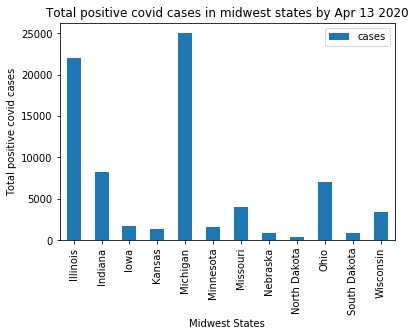

In [115]:
# Bar plot to show positive covid cases per state
state_positive_bar_chart = mw_state_positive_df.plot(kind='bar', title="Total positive covid cases in midwest states by Apr 13 2020")
state_positive_bar_chart.set_xlabel("Midwest States")
state_positive_bar_chart.set_ylabel("Total positive covid cases")
plt.savefig('Total positive covid cases in midwest states by Apr 13 2020.png')
plt.show()

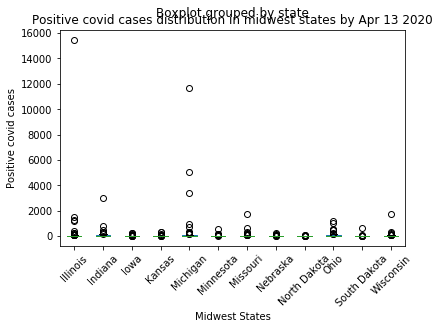

In [117]:
# Box plot to show the distribution of positive covid case in each state
mw_county_covid_dist = mw_census_covid_df.boxplot(column=['cases'], by='state',grid=False, rot=45, fontsize=10)
plt.title("Positive covid cases distribution in midwest states by Apr 13 2020")
plt.xlabel("Midwest States")
plt.ylabel("Positive covid cases")

plt.savefig('Positive covid cases distribution in midwest states by Apr 13 2020.png')
plt.show()

In [118]:
# Calculate the total covid death by state
mw_state_covid_df = mw_census_covid_df.groupby('state')  
mw_state_mortality_df = pd.DataFrame(mw_state_covid_df['deaths'].sum())
mw_state_mortality_df

,deaths
state,
Illinois,800
Indiana,350
Iowa,44
Kansas,63
Michigan,1591
Minnesota,70
Missouri,129
Nebraska,19
North Dakota,9


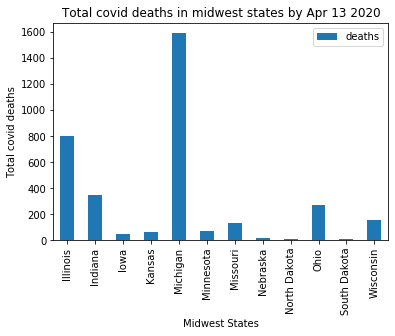

In [121]:
# Bar plot to show total covid death per state
state_mortality_bar_chart = mw_state_mortality_df.plot(kind='bar', title="Total covid deaths in midwest states by Apr 13 2020")
state_mortality_bar_chart.set_xlabel("Midwest States")
state_mortality_bar_chart.set_ylabel("Total covid deaths")
plt.savefig('Total covid deaths in midwest states by Apr 13 2020.png')
plt.show()

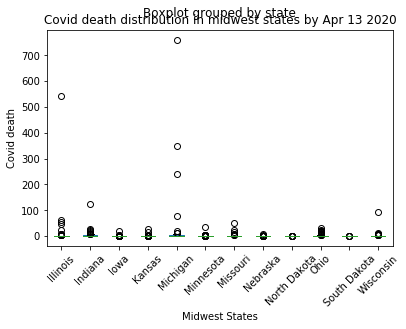

In [122]:
# Box plot to show the distribution of covid deaths in each state
mw_county_covid_death_dist = mw_census_covid_df.boxplot(column=['deaths'], by='state',grid=False, rot=45, fontsize=10)
plt.title("Covid death distribution in midwest states by Apr 13 2020")
plt.xlabel("Midwest States")
plt.ylabel("Covid death")

plt.savefig('Covid death distribution in midwest states by Apr 13 2020.png')
plt.show()

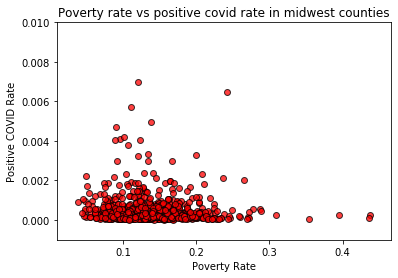

In [130]:
# Scatter plot to show poverty rate and positive covid case in midwest counties
mw_county_census_covid_rate_scatter = plt.scatter(mw_census_covid_df["Poverty Rate"], mw_census_covid_df["Positive Rate"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)


plt.ylim(-0.001, 0.010)
plt.title("Poverty rate vs positive covid rate in midwest counties")
plt.xlabel("Poverty Rate")
plt.ylabel("Positive COVID Rate")

plt.savefig('Poverty rate vs positive covid rate in midwest counties.png')

plt.show()

In [131]:
# Calculate the correlation statistic
poverty_covid_rate_correlation = st.pearsonr(mw_census_covid_df["Poverty Rate"], mw_census_covid_df["Positive Rate"])
poverty_covid_rate_correlation

(-0.0364457488194617, 0.29604663111891527)

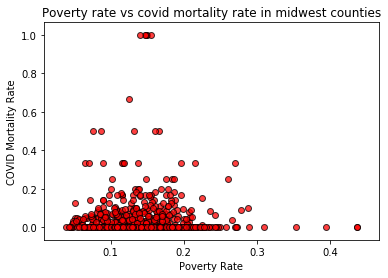

In [132]:
# Scatter plot to show poverty rate and covid mortality rate in midwest counties
mw_county_census_covid_rate_scatter = plt.scatter(mw_census_covid_df["Poverty Rate"], mw_census_covid_df["Mortality Rate"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title("Poverty rate vs covid mortality rate in midwest counties")
plt.xlabel("Poverty Rate")
plt.ylabel("COVID Mortality Rate")

plt.savefig('Poverty rate vs covid mortality rate in midwest counties.png')

plt.show()

In [133]:
# Calculate the correlation statistic
poverty_mortality_rate_correlation = st.pearsonr(mw_census_covid_df["Poverty Rate"], mw_census_covid_df["Mortality Rate"])
poverty_mortality_rate_correlation

(0.04267085375841176, 0.2211100190376904)

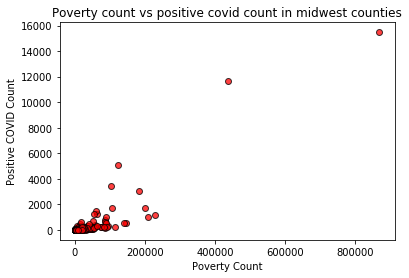

In [134]:
# Scatter plot to show poverty count and positive covid case in midwest counties
mw_county_poverty_covid_case_scatter = plt.scatter(mw_census_covid_df["Poverty Count"], mw_census_covid_df["cases"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title("Poverty count vs positive covid count in midwest counties")
plt.xlabel("Poverty Count")
plt.ylabel("Positive COVID Count")

plt.savefig('Poverty count vs positive covid count in midwest counties.png')

plt.show()

In [135]:
# Calculate the statistic
poverty_covid_count_correlation = st.pearsonr(mw_census_covid_df["Poverty Count"], mw_census_covid_df["cases"])
poverty_covid_count_correlation

(0.9065437367045699, 3.87569998633986e-310)

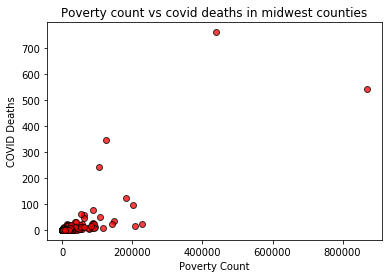

In [136]:
# Scatter plot to show poverty count and covid deaths in midwest counties
mw_county_poverty_covid_case_scatter = plt.scatter(mw_census_covid_df["Poverty Count"], mw_census_covid_df["deaths"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title("Poverty count vs covid deaths in midwest counties")
plt.xlabel("Poverty Count")
plt.ylabel("COVID Deaths")

plt.savefig('Poverty count vs covid deaths in midwest counties.png')

plt.show()

In [137]:
# Calculate the statistic
poverty_covid_death_correlation = st.pearsonr(mw_census_covid_df["Poverty Count"], mw_census_covid_df["deaths"])
poverty_covid_death_correlation

(0.7949544221822893, 1.3495801341779196e-180)